# Optimization

In [1]:
import modules
from modules import Aqua_Obj
import optimization
from optimization import OpData
import copy
from utilities import *
import numpy as np
import importlib
importlib.reload(modules)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sim_wecpen import *
import warnings
warnings.filterwarnings('ignore')

max_iter = 2000    

all_vars = ['x_wec','x_type_wec','x_pen', 'x_disc_pen', 'p_pen','x_env','p_wec','p_fish_salmon', 'x_es', 'p_es', 'pos_env', 'p_vessel']

wec_types = ['point_absorber_RM3'] #,'attenuator','terminator','point_absorber_RM3']

# design variables
x_name = ['pos_env']
x = OpData(x_name)

# parameters
param_name = ['x_type_wec', 'x_wec', 'x_pen','x_disc_pen', 'x_es']
param = OpData(param_name)

#get the optimal wecpen results and set as default parameters for env
args = {}
#args['fixed_num_pen'] = 11 #without cost of travel from shore
args['fixed_num_pen'] = 20  #with cost of travel from shore
_, _, wecpen, wecpen_best,wecpen_p_best, _ = wecpen_opt(all_vars + ['p_wave_vec'], args)
for i in range(len(wecpen.list)):
    param.nom_dict[wecpen.list[i]] = wecpen_best.x[i]
param.nom_dict['num_pens'] = wecpen_p_best['num_pens']
'''
# WEC and Pen Parameters are defined by optimal results obtained by running "run_sim_wec" 
param.nom_dict['capture_width']=  27        #[m]
param.nom_dict['pen_diameter']=   10.0     #[m]
param.nom_dict['pen_height']=     3.00     #[m]
param.nom_dict['spacing']=        150      #[m]
param.nom_dict['stock_density']=  30       #[kg/m^3]
param.nom_dict['pen_depth']=      10.0     #[m]
param.nom_dict['es_size']=        370.450  #[kWh]
param.nom_dict['num_pens']=       11       #[-]
'''
all_vars = all_vars + ['x_wave_ave']
#optimization
res={}
res_best={}
init_flag = 1

for i in range(len(wec_types)):
    param.nom_dict['wec_type'] = wec_types[i]
    
    res, op_obj, p = optimization.run_optimization(x.name, x.nom0, param.name, param.nom_dict, all_vars, max_iter)
    
    if init_flag:
        x_init, p_init = x , p
        res_best = copy.copy(res)
        p_best = p.nom_dict
    elif (res.success) and (res.fun < res_best.fun):
        res_best = copy.copy(res)
        p_best = p.nom_dict
    
    init_flag = 0


init_result(x_init.nom0, x_init.name, p_init.nom_dict)
optimize_result(x.name, x.list, x.unit, res_best, p_best)

Initial objective function terms:
   cost_per_yield      8.502 [$/kg]
   price          4583581.352 [$]
   fish_yield     539089.790 [kg]
----------------------------------------
Initial WEC rated power:
   P_rated         241.675 [kW]
----------------------------------------
Initial Port to deployment location distance:
   distance         284.652 [km]
----------------------------------------
Initial price break down:
   wec price            316640.126 [$]
   pen price            2114077.606 [$]
   fish feed price      1079448.026 [$]
   energy st price      818168.925 [$]
   vessel travel price  255246.669 [$]
----------------------------------------
Initial constraints:
   P_gen_cons             3019.074 [kWh]
   fish_yield_cons      3427189.394 [kg]
   env_Umin_cons             0.028 [m/s]
   env_Umax_cons             1.962 [m/s]
   env_tempmin_cons          8.766 [C]
   env_tempmax_cons         17.234 [C]
   env_salinitymin_cons      1.834 [PSU]
   env_salinitymax_cons      3.166 

# Plot fish growth and fish oxygen demand

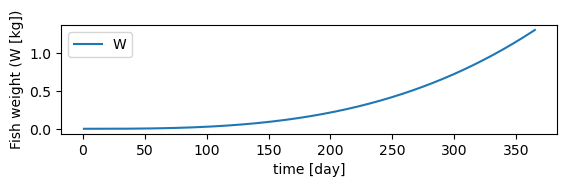

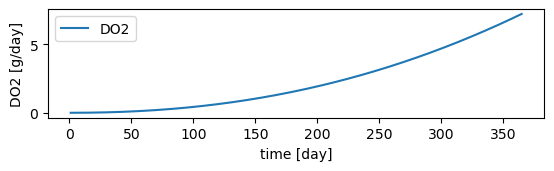

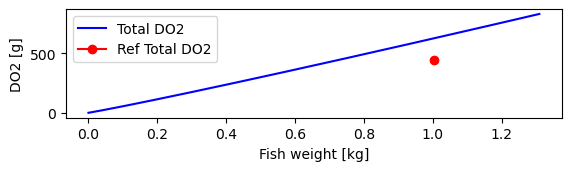

DO2 for 1kg fish 591.7028507712805
DO2 for 2kg fish 0
DO2 for 3kg fish 0
DO2 for 4kg fish 0
fish weight after 365 days 1309.183212127668


In [2]:
aqua_opt_obj = Aqua_Obj(res_best.x, x_name, p_best) 
aqua_opt_obj.plot_variable()

# Plot objective function and constraints

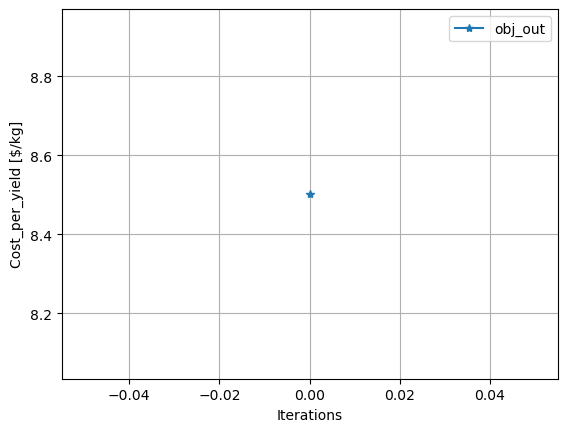

In [3]:
fig, ax = plt.subplots(1,1)
ax.plot(op_obj.f, label='obj_out', marker='*')
ax.set(xlabel='Iterations', ylabel='Cost_per_yield [$/kg]')
ax.legend()
ax.grid(True)
plt.show()

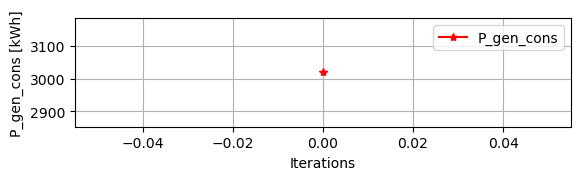

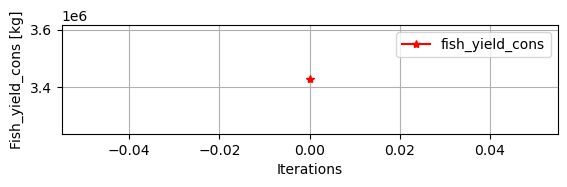

In [4]:
ax1 = plt.subplot(3,1,1)
ax1.plot(op_obj.ineq[:, 0], 'r', label='P_gen_cons', marker='*')
ax1.set(xlabel='Iterations', ylabel='P_gen_cons [kWh]');
ax1.legend()
ax1.grid(True)
plt.show()

ax2 = plt.subplot(3,1,2)
ax2.plot(op_obj.ineq[:, 1], 'r', label='fish_yield_cons', marker='*')
ax2.set(xlabel='Iterations', ylabel='Fish_yield_cons [kg]');
ax2.legend()
ax2.grid(True)
plt.show()
